In [26]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv(next(iter(uploaded)))


Saving labeled_data.csv to labeled_data (1).csv


In [2]:
df.head(15)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [27]:
df = df.drop(columns="offensive_language")
df = df.drop(columns="hate_speech")
df = df.drop(columns="neither")
df = df.drop(columns="count")
df = df.drop(columns="Unnamed: 0")

In [28]:
df.head(15)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [29]:
# prompt: convert colum "tweet" to str
import re

df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\x00-\x7f]', '', x))


In [30]:
print(df['tweet'].head())

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8039004707464694


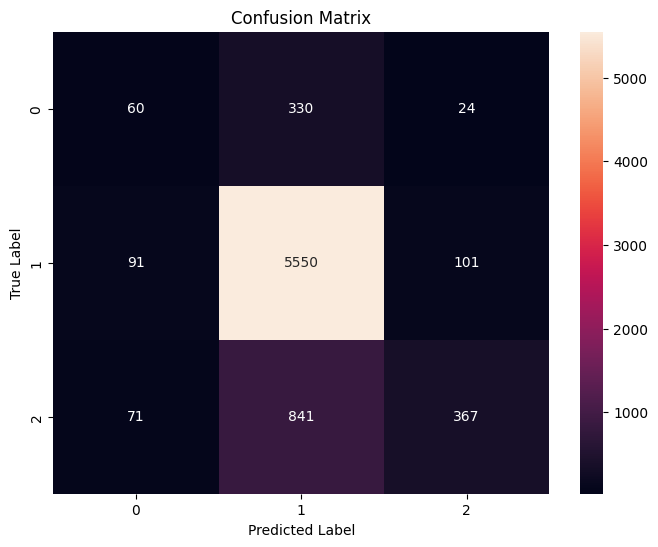

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.14      0.19       414
           1       0.83      0.97      0.89      5742
           2       0.75      0.29      0.41      1279

    accuracy                           0.80      7435
   macro avg       0.61      0.47      0.50      7435
weighted avg       0.78      0.80      0.77      7435



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = df['tweet']
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use CountVectorizer to convert tweets to numerical features
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# One-hot encode class labels (optional, but recommended for some KNN distance metrics)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_features, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test_features)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
import seaborn as sns  # Import seaborn for heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf



X = df['tweet']
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use CountVectorizer to convert tweets to numerical features
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# One-hot encode class labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the neural network model
model = Sequential()

# Embedding layer for vocabulary representation (adjust embedding size as needed)
# Find the maximum value per column (assuming each column represents a word)
max_indices = X_train_features.sum(axis=0).max(axis=0)

# Assuming vocabulary size is stored in a variable (e.g., from CountVectorizer)
max_length = int(np.max(max_indices) + 1) # Consider adding 1 to account for 0-based indexing

model.add(Embedding(input_dim=X_train_features.shape[1], output_dim=128, input_length=max_length))

# Hidden layers with ReLU activation
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=2, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(units=3, activation='softmax'))

# Compile the model with loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Reorder X_train_features to ensure sorted indices
X_train_features_reordered = tf.sparse.reorder(X_train_features)

# Use the reordered features for training
model.fit(X_train_features_reordered, y_train_encoded, epochs=30, batch_size=32) # Adjust epochs and batch size as needed

# Make predictions on test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Plot predicted vs actual labels (optional)
# You can use the same plotting approach from the KNN section

# Evaluate the model further (optional)
# You can use confusion matrix and classification report as shown in the KNN section


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Input must be a SparseTensor.

In [80]:
pip install gensim[feature_extraction]

In [81]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from gensim import TfidfVectorizer  # Alternative import path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = df['tweet']
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use gensim TfidfVectorizer to convert tweets to sparse features (adjust parameters as needed)
vectorizer = TfidfVectorizer(max_features=10000, sparse=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# One-hot encode class labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the neural network model
model = Sequential()

# Check if X_train_features is a sparse tensor (should be from gensim)
if not isinstance(X_train_features, tf.sparse.SparseTensor):
  raise ValueError("X_train_features is not a sparse tensor after gensim vectorization.")

max_indices = X_train_features.sum(axis=0).max(axis=0)

# Assuming vocabulary size is stored in a variable (e.g., from gensim)
max_length = int(np.max(max_indices) + 1)

# Embedding layer for vocabulary representation (adjust embedding size as needed)
model.add(Embedding(input_dim=X_train_features.shape[1], output_dim=128, input_length=max_length))

# Hidden layers with ReLU activation
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=2, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(units=3, activation='softmax'))

# Compile the model with loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reorder X_train_features to ensure sorted indices
X_train_features_reordered = tf.sparse.reorder(X_train_features)

# Train the model
model.fit(X_train_features_reordered, y_train_encoded, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Make predictions on test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Plot predicted vs actual labels (optional)
# You can use the same plotting approach from the KNN section

# Evaluate the model further (optional)
# You can use confusion matrix and classification report as shown in the KNN section


ImportError: cannot import name 'TfidfVectorizer' from 'gensim' (/usr/local/lib/python3.10/dist-packages/gensim/__init__.py)

In [82]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweets'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

sequences = tokenizer.texts_to_sequences(df['tweets'])
max_sequence_length = max([len(seq) for seq in sequences])

padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['class'], test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=max_sequence_length),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes, so output layer has 3 units with softmax activation
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

KeyError: 'tweets'